# CLASIFICACION CON SVM Y NN

**Alumno: Octavio Pino Rosas**

En la presente actividad se va a emplear un dataset que contiene información de características de celulares para clasificarlos en un rango de precios.

La información del *dataset* es:
* *battery_power*: Energía total que una batería puede almacenar en un tiempo medido en *mAh*
* *blue*: Indica si tiene *bluetooth* o no
* *clock_speed*: Velocidad del microprocesador
* *dual_sim*: Indica si tiene soporte dual de *sim* o no
* *fc*: Megapíxeles de la cámara frontal
* *four_g*: Indica si tiene 4G o no
* *int_memory*: Memoria interna en GB
* *m_dep*: Grosor del celular en cm
* *mobile_wt*: Peso del celular
* *n_cores*: Número de núcleos del procesador
* *pc*: Megapíxeles de la cámara principal
* *px_height*: Alto de la resolución de píxeles
* *px_width*: Ancho de resolución de píxeles
* *ram*: RAM en MB
* *sc_h*: Alto de la pantalla en cm
* *sc_w*: Ancho de la pantalla en cm
* *talk_time*: tiempo máximo que durará una sola carga de la batería
* *tres_g*: Indica si es 3G o no
* *touch_screen*: Indica si tiene pantalla táctil o no
* *wifi*: Indica si tiene wifi o no
* ***price_range***: Es la variable objetivo con valor 0 (bajo costo), 1 (costo medio), 2 (costo alto) y 3 (costo muy alto).

---

# Recomendaciones generales

1. **Establece una semilla aleatoria** para garantizar la reproducibilidad de los resultados (la semilla se definirá más adelante).
2. **Lee el dataset solo una vez**, al inicio del notebook. Evita cargarlo repetidamente.
3. **Usa exclusivamente los hiperparámetros indicados** en cada modelo. Por ejemplo, en el primer SVM utiliza C=1. No modifiques ningún valor a menos que se solicite explícitamente.
4. **Organiza tu notebook** incluyendo celdas para: código, visualizaciones y análisis textual (explicaciones, interpretaciones, etc.).
5. **Responde de manera clara y completa**, siguiendo las instrucciones de cada ejercicio. Cuida tu redacción, ortografía y coherencia.
6. **Ante dudas o ambigüedades**, consulta a través de los canales de comunicación establecidos para resolverlas oportunamente.
7. **Antes de entregar tu actividad**, reinicia el kernel y ejecuta todas las celdas nuevamente para verificar la coherencia de los resultados.

### IMPORTACIÓN DE LIBRERIAS A UTILIZAR

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### Definición de semilla

In [66]:
# La semilla que se va a emplear en la presente actividad es 1234, la cual no debes modificar, para garantizar que los resultados que reportes coincidan con los esperados
seed = 1234

### CARGA DEL DATASET

In [67]:
# importar librerias para leere el dataset desde Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [68]:
# Ruta del dataset desde Drive
# data = pd.read_csv('./drive/MyDrive/ML/train.csv')

# Importar datos desde archivo descargado
data = pd.read_csv("train.csv")
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [69]:
#Tamaño del dataset
data.shape

(2000, 21)

In [70]:
#Información de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# 1. Análisis Exploratorio de Datos (EDA)

## Variables numéricas

In [71]:
#Resumen estadístico de las variables
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### **1.1. Escriba el código que permita crear la matriz de correlación de todas las variables numéricas:**

Este paso nos permite ver la relacion que hay entre cada una de las variables presentes en el dataset, ñas cuales son tomadas en cuenta a la hora del entrenameinto del modelo, aun cuando no se puedan persibir fuera del modelo de entrenado.

In [72]:
corr = data.corr()
corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


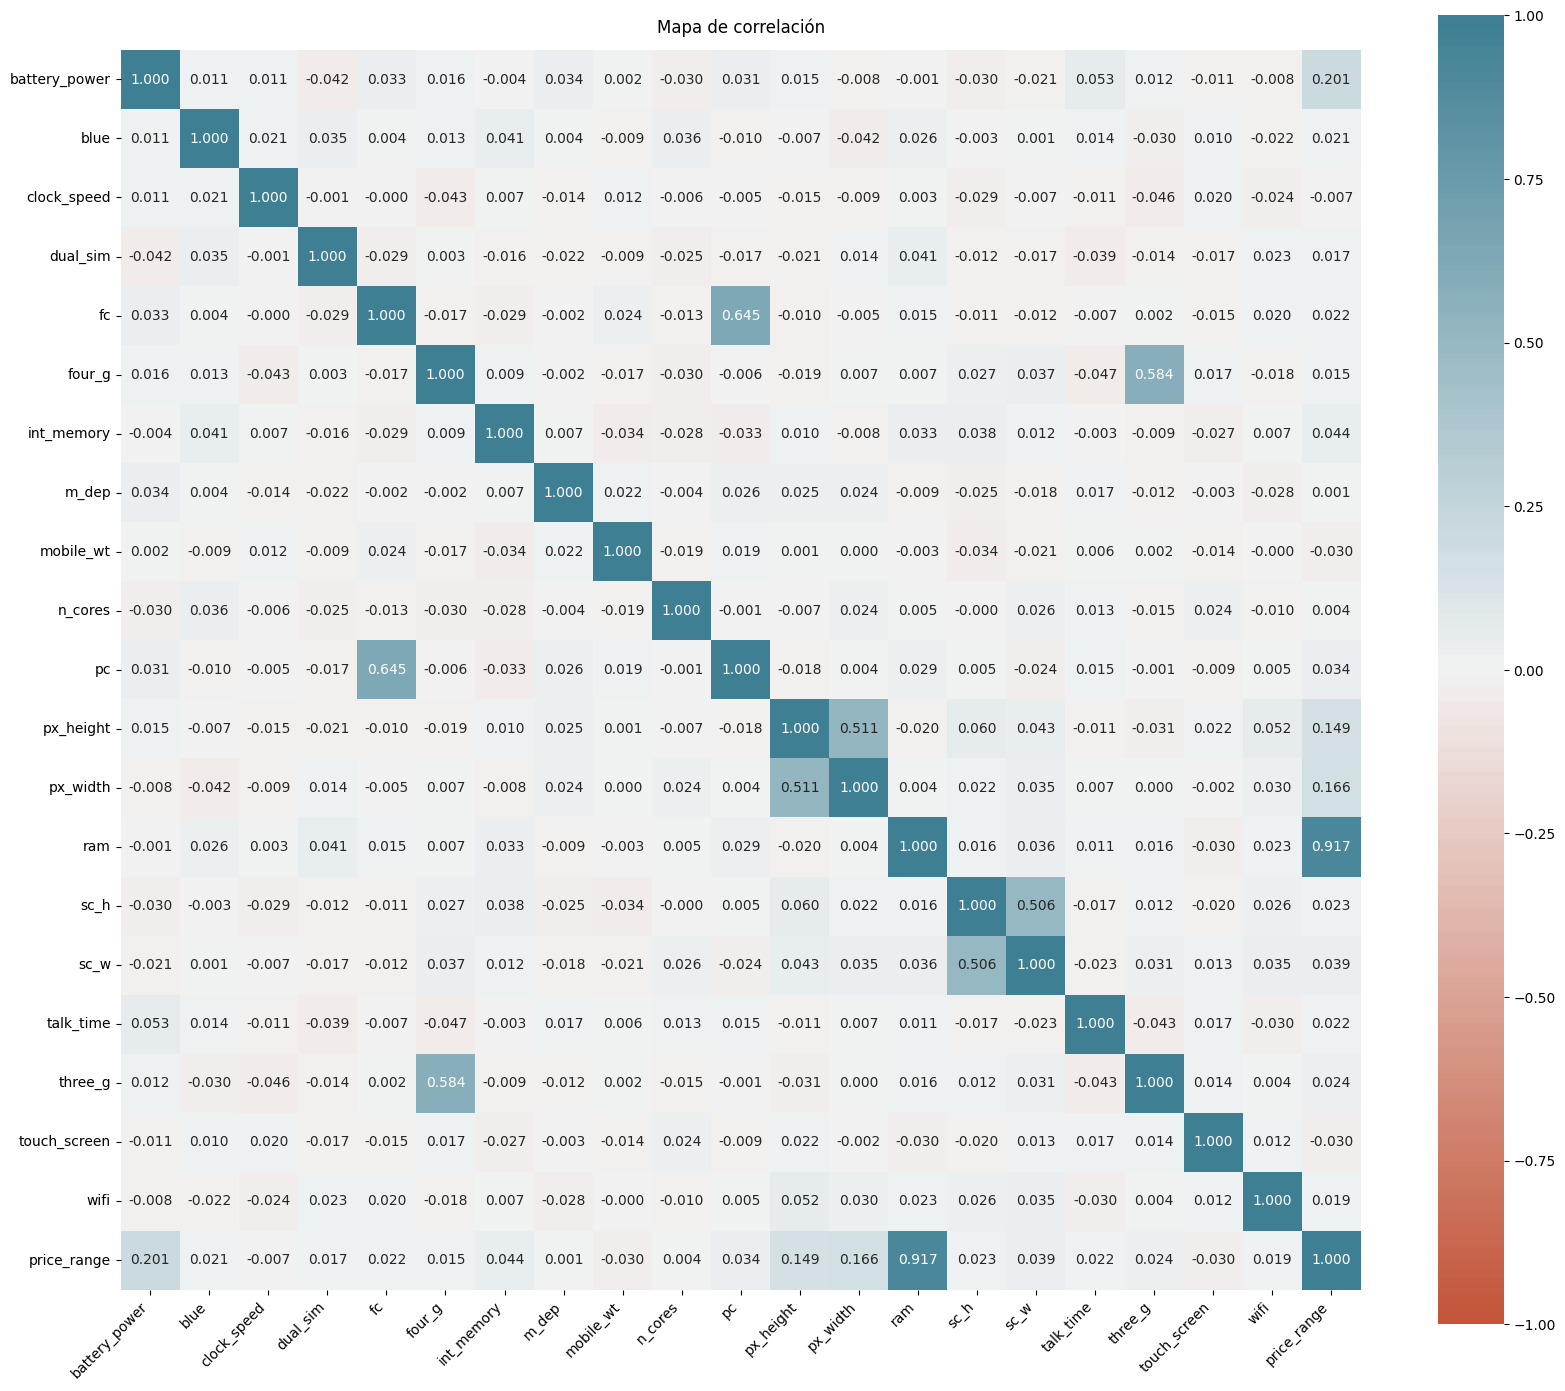

In [73]:
corr= data.corr()
plt.figure(figsize=(20,17))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True, fmt=".3f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ax.set_title('Mapa de correlación', fontdict={'fontsize':12}, pad=12);

## Variables catégoricas

### **1.2. Escriba el código para su análisis y la creación de gráficos de frecuencia:**


In [74]:
# Variables categóricas
lst_catvar = list(data.select_dtypes(include='object')) + ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']
print(f'Variables categóricas\n{lst_catvar}')
# Variables numéricas discretas
lst_disvar = list(filter(lambda col: col not in ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range'], data.select_dtypes(include='int')))
print(f'Variables numéricas discretas\n{lst_disvar}')
# Variables numéricas continuas
lst_contvar = list(set(data.columns)-set(lst_catvar).union(set(lst_disvar)))
print(f'Variables numéricas continuas\n{lst_contvar}')

Variables categóricas
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
Variables numéricas discretas
['battery_power', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
Variables numéricas continuas
['clock_speed', 'm_dep']


In [75]:
for col in data[lst_catvar]:
  lst_unique = data[col].unique()
  if len(lst_unique)<10:
    print(f'{col}: {lst_unique}')
  else:
    print(f'La variable {col} tiene {len(lst_unique)} valores distintos')

blue: [0 1]
dual_sim: [0 1]
four_g: [0 1]
three_g: [0 1]
touch_screen: [0 1]
wifi: [1 0]
price_range: [1 2 3 0]


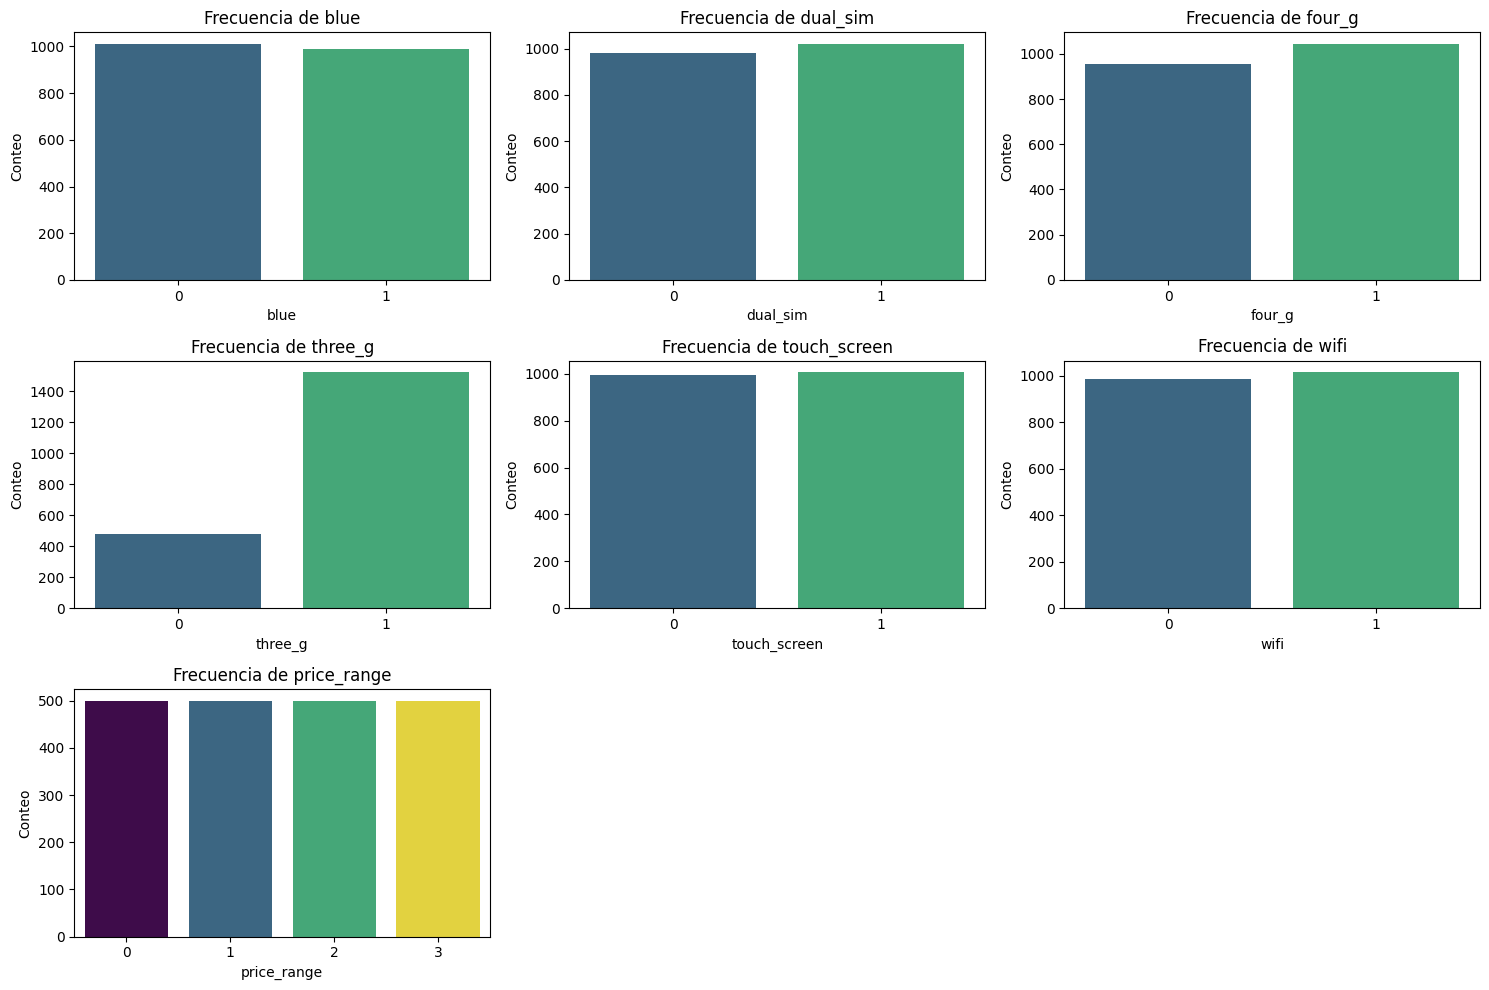

In [76]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(lst_catvar):
    plt.subplot(3, 3, i + 1)

    # Usamos sns.countplot para el conteo de frecuencias
    sns.countplot(x=col, data=data, palette='viridis', hue=col, legend=False)
    plt.title(f'Frecuencia de {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

### **1.3. Escriba el código que permita validar si el dataset está balanceado**

In [77]:
data['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


In [78]:
data['price_range'].value_counts(normalize=True)

,proportion
price_range,
1,0.25
2,0.25
3,0.25
0,0.25


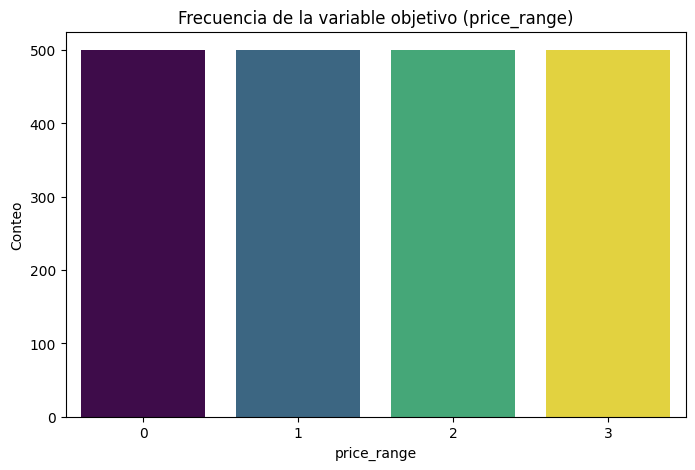

In [79]:
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=data, palette='viridis', hue='price_range', legend=False)
plt.title('Frecuencia de la variable objetivo (price_range)', fontsize=12)
plt.xlabel('price_range')
plt.ylabel('Conteo')
plt.show()

Podemos ver que los datos estan balanceados, es decir hay la misma cantidad de datos de las cuatro posibles categorias del resultado, lo cual hace que se tenga el mismo peso de cada uno de estas.

## PREPROCESAMIENTO DE DATOS
En este paso verificamos que se mantenga el tamaño del conjunto de datos en la copia que se modificara. Para despues dividirlos datos en un conjunto de entrenamiento y otro de prueba, que verificara el modelo entrenado generalice de foroma correcta, sin sobreajustarse o generalizar demaciado.

In [80]:
#Crear una copia del dataset para modificaciones
data2 = data.copy()

In [81]:
#Verificar tamaño
data2.shape

(2000, 21)

In [82]:
# Separación de los datos en train y test
X = data2.drop(columns = 'price_range')
y = data2['price_range']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = seed,
                                        shuffle      = True
                                    )

### Escriba el código que permita reescalar todos los atributos del dataset utilizando la función del StandardScaler:

In [83]:
# Código para reescalar X_train y X_test mediante StandardScaler
scaler_train = StandardScaler()
X_train_scaler = scaler_train.fit_transform(X_train)
X_test_scaler = scaler_train.transform(X_test)

# 2. Aplicación de SVM sobre los datos

⚠️ Importante:

A partir de esta sección, utiliza los datos estandarizados.

### **2.1. Escriba el código que permita crear un modelo utilizando SVM con kernel lineal, el valor de C =1 y random_state=seed**

In [84]:
# Creación del modelo SVM lineal
modeloSVM = SVC(kernel= 'linear', C=1, random_state=seed)
# Entrenamiento del modelo
modeloSVM.fit(X_train_scaler, y_train)

SVC(C=1, kernel='linear', random_state=1234)

In [85]:
# Predicciones test
predictSVM = modeloSVM.predict(X_test_scaler)
predictSVM

array([1, 2, 2, 2, 2, 2, 1, 3, 1, 3, 3, 3, 0, 2, 3, 0, 3, 2, 2, 2, 0, 1,
       1, 0, 3, 2, 0, 3, 1, 0, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 1, 3, 2,
       1, 0, 2, 2, 0, 3, 3, 0, 1, 2, 1, 3, 3, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       0, 3, 3, 3, 0, 3, 1, 3, 1, 2, 1, 2, 2, 3, 3, 2, 1, 0, 2, 3, 2, 3,
       3, 1, 1, 2, 0, 1, 3, 0, 1, 2, 2, 2, 0, 1, 0, 2, 3, 2, 3, 3, 1, 1,
       2, 2, 0, 1, 2, 3, 3, 2, 2, 1, 1, 0, 1, 2, 3, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 3, 0, 2, 0, 2, 0, 0, 3, 0, 3,
       1, 3, 2, 2, 1, 2, 2, 3, 0, 2, 2, 1, 1, 2, 0, 0, 1, 3, 1, 1, 3, 1,
       3, 0, 2, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0,
       1, 1, 2, 3, 3, 0, 2, 1, 3, 3, 1, 3, 1, 0, 3, 1, 2, 3, 3, 2, 3, 3,
       3, 2, 0, 3, 0, 3, 1, 0, 2, 3, 0, 0, 2, 1, 3, 1, 3, 1, 1, 1, 3, 1,
       2, 0, 2, 2, 3, 2, 3, 1, 1, 3, 1, 3, 2, 0, 2, 1, 0, 2, 3, 1, 0, 0,
       0, 0, 1, 3, 2, 2, 1, 0, 3, 0, 0, 2, 3, 0, 3, 2, 1, 1, 3, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 3, 3,

### **2.2. Escriba el código que permita hallar la exactitud (accuracy) del modelo SVM anteriormente entrenado:**

In [86]:
modeloSVM.score(X_test_scaler,y_test)

0.9675

Modelo SVM
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        93
           1       0.96      0.95      0.96       102
           2       0.96      0.94      0.95        98
           3       0.97      0.99      0.98       107

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



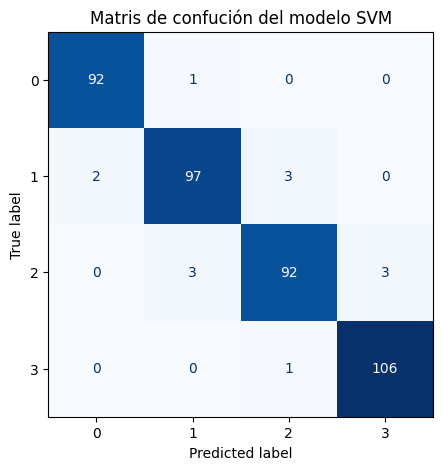

In [87]:
# Reporte de métricas
print("Modelo SVM")
print(classification_report(y_test, predictSVM))

# Matriz de confusión
cm_svc = confusion_matrix(y_test, predictSVM)
# Mostrar la matriz
fig, ax = plt.subplots(figsize=(6, 5))
labels = np.unique(y_test)  # Etiquetas de clase
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc,
                              display_labels=labels)
disp.plot(cmap='Blues', colorbar=False, ax=ax)
ax.set_title('Matris de confución del modelo SVM')
plt.show()

### **2.3. Escriba el código que permita encontrar los mejores parámetros para el modelo  SVM, con un param_grid = {'C': np.linspace(0.1, 100, 20), 'kernel': ('linear', 'rbf')**

#### Ajuste de hiperparámetros (GridSearchCV)

⚠️ Restricción:

**No imprimas los resultados del GridSearchCV**. Solo utiliza los mejores parámetros encontrados.

In [88]:
# Para que no se impriman los resultados, estos se asignan a _

# Parametros solicitados
param_grid = {
    'C': np.linspace(0.1, 100, 20),
    'kernel': ('linear', 'rbf')
}

grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=0,
    refit=True
)

# Entrenamiento
_ = grid.fit(X_train_scaler, y_train)

# Predicción en test
y_pred = grid.predict(X_test_scaler)

# Resultados
resultados = (
    pd.DataFrame(grid.cv_results_)
    .filter(regex='(param.*|mean_t|std_t)')
    .drop(columns='params')
    .sort_values('mean_test_score', ascending=False)
    .head(5)
)

resultados

,param_C,param_kernel,mean_test_score,std_test_score
16,42.163158,linear,0.969375,0.011075
18,47.421053,linear,0.969375,0.012087
14,36.905263,linear,0.969375,0.008705
10,26.389474,linear,0.968750,0.010643
22,57.936842,linear,0.968750,0.010643


### **2.4. Escriba el código que permita conocer los mejores parámetros encontrados en el ítem anterior**

In [89]:
# Mejor parámetro
print(f'Mejores parámetros {grid.best_params_}')

Mejores parámetros {'C': np.float64(36.905263157894744), 'kernel': 'linear'}


In [90]:
# Modelo después del ajuste de hiperparámetros
print(grid.best_estimator_)

SVC(C=np.float64(36.905263157894744), kernel='linear')


### **2.5. Escriba el código que permita hallar la exactitud del modelo de SVM aplicando los mejores parámetros**

In [91]:
# Accuracy de test del modelo
# ==============================================================================
exactitud = accuracy_score(y_test, y_pred)
print("Exactitud del modelo SVM:", exactitud)

Exactitud del modelo SVM: 0.965


### **2.6. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

Reporte de métricas del modelo SVM:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        93
           1       0.96      0.94      0.95       102
           2       0.94      0.94      0.94        98
           3       0.97      0.99      0.98       107

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



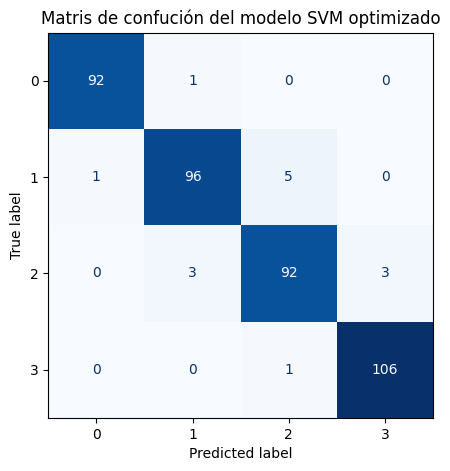

In [92]:
# Reporte de métricas
reporte = classification_report(y_test, y_pred)
print("Reporte de métricas del modelo SVM optimizado:\n")
print(reporte)

# Matriz de confusión
cm_svc = confusion_matrix(y_test, y_pred)
# Mostrar la matriz
fig, ax = plt.subplots(figsize=(6, 5))
labels = np.unique(y_test)  # Etiquetas de clase
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc,
                              display_labels=labels)
disp.plot(cmap='Blues', colorbar=False, ax=ax)
ax.set_title('Matris de confución del modelo SVM optimizado')
plt.show()

# 3. REDES NEURONALES

⚠️ Recordatorio:

* Mantén los datos normalizados (los mismos que usaste en SVM).
* No regreses al dataset original ni repitas pasos anteriores, a menos que se indique explícitamente.

### **3.1. Escriba el código que permita entrenar un perceptrón multicapa con 3 capas ocultas con 200, 100 y 50 neuronas respectivamente en cada capa. Función de activación 'Relu' y random_state=seed**

In [93]:
classifier = MLPClassifier(
    hidden_layer_sizes=(200, 100, 50),
    activation='relu',
    random_state=seed,
    max_iter=500
)

# Entrenamiento del modelo
classifier.fit(X_train_scaler, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=500,
              random_state=1234)

### **3.2. Escriba el código que permita hallar la exactitud del modelo de redes neuronales anteriormente entrenado:**

In [96]:
# Obtener predicciones del modelo
y_pred_NN = classifier.predict(X_test_scaler)

# Calcular exactitud
exactitud = accuracy_score(y_test, y_pred_NN)
print("Exactitud del modelo de Redes Neuronales:", exactitud)

Exactitud del modelo de Redes Neuronales: 0.925


### **3.3. Escriba el código que permita hallar la las métricas del modelo entrenado en el ítem anterior. Utilice la función classification_report**

Métricas del modelo de Redes Neuronales:

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        93
           1       0.93      0.85      0.89       102
           2       0.87      0.94      0.90        98
           3       0.97      0.95      0.96       107

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.92       400
weighted avg       0.93      0.93      0.92       400



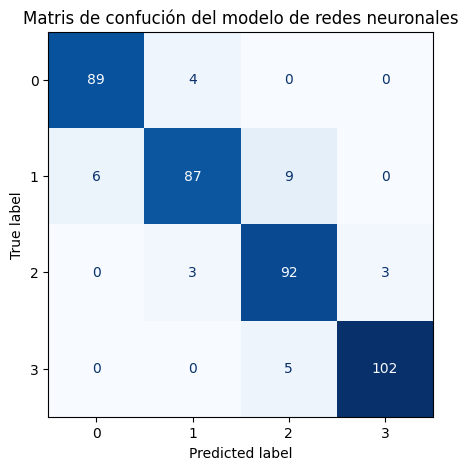

In [97]:
# Reporte de métricas
reporte = classification_report(y_test, y_pred_NN)

print("Métricas del modelo de Redes Neuronales:\n")
print(reporte)

# Matriz de confusión
cm_svc = confusion_matrix(y_test, y_pred_NN)
# Mostrar la matriz
fig, ax = plt.subplots(figsize=(6, 5))
labels = np.unique(y_test)  # Etiquetas de clase
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc,
                              display_labels=labels)
disp.plot(cmap='Blues', colorbar=False, ax=ax)
ax.set_title('Matris de confución del modelo de redes neuronales')
plt.show()

### 4. **Conclusiones**

| Modelo | Accuaracy (Exactitud) |
|--------|-----------------------|
| SVM | 0.9675 |
| SVM Optimizado | 0.965 |
| Red neuronal | 0.925 |

El **modelo SVM** obtuvo una exactitud del 96.75%, siendo el mejor desempeño entre los tres modelos evaluados.
La matriz de confusión muestra predicciones muy precisas para las cuatro clases de price_range, con muy pocas equivocaciones entre categorías adyacentes.

Según las métricas por clase:
- Precision: entre 0.96 y 0.98
- Recall: entre 0.94 y 0.99
- F1-score: entre 0.95 y 0.98

Estas métricas indican que el modelo es consistente y preciso en todas las clases, sin mostrar un sesgo o pérdida significativa de desempeño en alguna categoría específica.
Además, el modelo captura muy bien la estructura del dataset, probablemente porque los datos presentan fronteras bien separables después de la estandarización.

En general, el SVM estándar ofrece:

Excelente precisión, muy buen equilibrio entre las métricas, misclasificaciones mínimas y un entrenamiento relativamente rápido.

El modelo **SVM optimizado** obtuvo una exactitud ligeramente inferior al modelo base: 96.5%.
Aunque el ajuste de hiperparámetros buscaba mejorar el desempeño, en este caso el resultado fue muy similar o incluso marginalmente peor.

Las métricas muestran una ligera caída en el desempeño de la clase 1 (recall = 0.94 → varias instancias clasificadas como clase 2), mejor precisión en la clase 0 (0.99) y gran estabilidad en la clase 3 y un F1-scores entre 0.94 y 0.99.

Este comportamiento sugiere que los parámetros iniciales del modelo ya eran muy adecuados para la estructura del dataset, y que el ajuste no aportó mejoras significativas.

Por otro lado, la **red neuronal** obtuvo una exactitud de 92.5%, siendo el modelo con menor rendimiento de los tres.
Aun así, se trata de un resultado notable considerando la simplicidad de la arquitectura.

Las métricas muestran un buen desempeño general en las clases 0 y 3 (precision y recall superiores al 0.95), dificultad en la clase 1, donde el recall baja a 0.85, indicando que el modelo tiende a confundir esta clase con las clases adyacentes (0 o 2), la clase 2 se clasifica razonablemente bien (recall = 0.94), pero con precisión moderada (0.87), esto sugiere que la red neuronal aprende patrones generales pero tiene mayor variabilidad entre clases, posiblemente por:

Necesidad de más épocas de entrenamiento, una arquitectura más profunda, hiperparámetros más ajustados y regularización o batch normalization

La matriz de confusión muestra más dispersión que en los modelos SVM, lo que confirma la menor capacidad para separar completamente las fronteras entre clases.



**1. Métricas relevantes:**

- ¿Cuáles métricas fueron clave para evaluar el desempeño?

Para evaluar adecuadamente el desempeño de los modelos se consideraron principalmente las métricas:
  - Accuracy (Exactitud): permitió comparar el rendimiento general de cada modelo.
SVM obtuvo hasta 96.75%, SVM optimizado 96.5% y MLP 92.5%.

  - Precision, Recall y F1-score: fueron clave para analizar qué tan bien cada modelo clasificó las cuatro categorías, especialmente cuando existían confusiones entre clases adyacentes.

    Estas métricas evidenciaron:  
    En SVM, un desempeño muy equilibrado entre clases, con F1-scores superiores al 0.95.

    En MLP, mayor variabilidad entre clases, especialmente en la clase 1, donde el recall disminuyó a 0.85.

  - Matriz de confusión: resultó esencial para visualizar en qué clases se producían los errores de clasificación.
  SVM mostró muy poca dispersión, mientras que MLP presentó más confusiones entre clases cercanas.

  En conjunto, estas métricas permitieron evaluar no solo la precisión global, sino la capacidad del modelo para distinguir apropiadamente entre categorías cercanas.


**2. Fortalezas y limitaciones:**

**SVM**

- SVM — Fortalezas

  Ofreció el mejor desempeño global, con la mayor exactitud y el mejor equilibrio entre precision, recall y F1-score.

  Muy pocas confusiones entre categorías, especialmente en las clases extremas (0 y 3).

  Requiere menos recursos computacionales para alcanzar resultados sobresalientes.

- SVM — Limitaciones

  Aunque se realizó ajuste de hiperparámetros, la mejora fue mínima o nula, lo que indica que el modelo ya estaba cerca de su óptimo desde el inicio.

  Puede volverse más lento o ineficiente si se aplicara a conjuntos de datos mucho más grandes o con miles de características.  
  
  
**MLP**

* MLP — Fortalezas

  Tiene la capacidad de modelar relaciones no lineales complejas y podría mejorar con más tuning, capas adicionales o mayor cantidad de datos.

  Desempeño razonablemente bueno en general (92.5%), especialmente en clases como 0 y 3.

* MLP — Limitaciones

  Mostró mayor variabilidad entre clases, especialmente en la clase 1, donde hubo una baja en recall.

  Se concliuye que requiere más tiempo de entrenamiento y ajuste para alcanzar niveles similares a SVM.

  Más sensible a hiperparámetros como número de neuronas, tasa de aprendizaje o número de épocas.